In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    8362868,
    8663041,
    9041835,
    9430261,
    9831897,
    10290215,
    10519729,
    10771998,
    11083652,
    11422507,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/11/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
# dataframe = pd.DataFrame({'date': pd.date_range(start='1/18/2021', end='2/9/2021'), 'daily': daily_moving_average, 'cumulative': cumulative_vaccinations[6:]})
# dataframe.set_index('date', inplace=True)

In [4]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [5]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 45)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (100000 + (math.log(x) * 350 * i)) for i, x in enumerate(projection, start=1)]
print(projection)

[286496.01173094945, 287479.9632690035, 288454.33815402037, 289419.331150374, 290375.1300668207, 291321.9161013647, 292259.8641645185, 293189.1431825806, 294109.91638241406, 295022.34155908023, 295926.57132756663, 296822.75335974543, 297711.030607603, 298591.541513697, 299464.4202097189, 300329.79670397105, 301187.7970585024, 302038.5435565889, 302882.1548611927, 303718.74616498395, 304548.42933246755, 305371.3130347134, 306187.5028771559, 306997.1015208908, 307800.20879786834, 308596.92182035395, 309387.3350849991, 310171.5405718426, 310949.6278385427, 311721.6841101117, 312487.79436441883, 313248.0414136974, 314002.5059822828, 314751.26678079367, 315494.40057695005, 316231.982263215, 316964.0849214302, 317690.77988460823, 318412.1367960316, 319128.2236658014, 319839.1069249681, 320544.8514773695, 321245.5207492941, 321941.17673707905, 322631.8800527466]


In [6]:
prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [7]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-12  286496.011731  1.170900e+07
2021-02-13  287479.963269  1.199648e+07
2021-02-14  288454.338154  1.228494e+07
2021-02-15  289419.331150  1.257436e+07
2021-02-16  290375.130067  1.286473e+07
2021-02-17  291321.916101  1.315605e+07
2021-02-18  292259.864165  1.344831e+07
2021-02-19  293189.143183  1.374150e+07
2021-02-20  294109.916382  1.403561e+07
2021-02-21  295022.341559  1.433063e+07
2021-02-22  295926.571328  1.462656e+07
2021-02-23  296822.753360  1.492338e+07
2021-02-24  297711.030608  1.522110e+07
2021-02-25  298591.541514  1.551969e+07
2021-02-26  299464.420210  1.581915e+07
2021-02-27  300329.796704  1.611948e+07
2021-02-28  301187.797059  1.642067e+07
2021-03-01  302038.543557  1.672271e+07
2021-03-02  302882.154861  1.702559e+07
2021-03-03  303718.746165  1.732931e+07
2021-03-04  304548.429332  1.763386e+07
2021-03-05  305371.313035  1.793923e+07
2021-03-06  306187.502877  1.824542e+07


In [8]:
complete = pd.concat([dataframe, result_df])
print(complete.head(25))


               daily  cumulative
date                            
2021-01-12  100000.0   1959151.0
2021-01-13  121129.0   2080280.0
2021-01-14  174276.0   2254556.0
2021-01-15  239815.0   2494371.0
2021-01-16  274793.0   2769164.0
2021-01-17  320894.0   3090058.0
2021-01-18  275434.0   3365492.0
2021-01-19  154564.0   3520056.0
2021-01-20  167150.0   3687206.0
2021-01-21  298373.0   3985579.0
2021-01-22  318151.0   4303730.0
2021-01-23  357563.0   4661293.0
2021-01-24  424478.0   5085771.0
2021-01-25  641922.0   5727693.0
2021-01-26  234851.0   5962544.0
2021-01-27  259306.0   6221850.0
2021-01-28  251902.0   6473752.0
2021-01-29  343193.0   6816945.0
2021-01-30  436360.0   7253305.0
2021-01-31  539691.0   7792996.0
2021-02-01  289359.0   8082355.0
2021-02-02  280513.0   8362868.0
2021-02-03  300173.0   8663041.0
2021-02-04  378794.0   9041835.0
2021-02-05  388426.0   9430261.0


<Figure size 432x288 with 0 Axes>

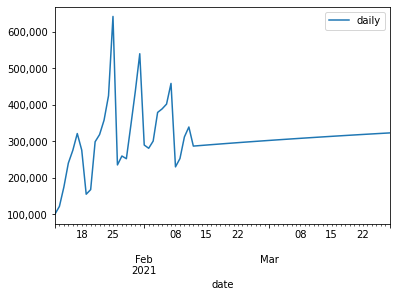

<Figure size 432x288 with 0 Axes>

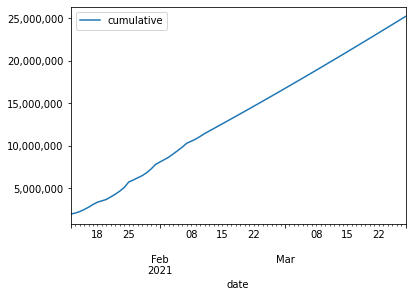

In [9]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

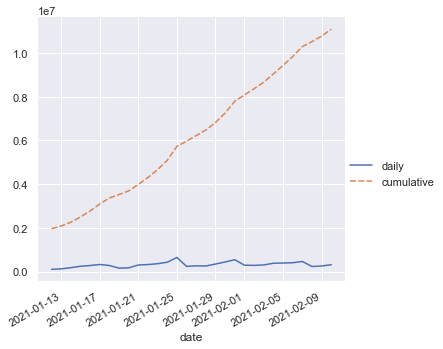

In [10]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
